In [5]:
import numpy as np
import torch
import torch.nn as nn

##### nn.Linear layer

In [10]:
torch.manual_seed(2023)
input = torch.randn(2, 4)
print(input.size())
print(input)

torch.Size([2, 4])
tensor([[-1.2075,  0.5493, -0.3856,  0.6910],
        [-0.7424,  0.1570,  0.0721,  1.1055]])


In [11]:
m = nn.Linear(in_features=4, out_features=3, bias=False)
print(m)

Linear(in_features=4, out_features=3, bias=False)


In [12]:
m.weight

Parameter containing:
tensor([[-0.2568,  0.4644,  0.0034, -0.4680],
        [ 0.3316, -0.1193, -0.1461, -0.2886],
        [ 0.4839,  0.1632,  0.2001, -0.4845]], requires_grad=True)

In [13]:
output = m(input)
print(output.shape)
print(output)

torch.Size([2, 3])
tensor([[ 0.2406, -0.6090, -0.9066],
        [-0.2534, -0.5945, -0.8548]], grad_fn=<MmBackward0>)


In [17]:
output_matmul = np.matmul(input, m.weight.T.detach().numpy())
print(output_matmul)

tensor([[ 0.2406, -0.6090, -0.9066],
        [-0.2534, -0.5945, -0.8548]])


In [19]:
output.detach() == output_matmul

tensor([[True, True, True],
        [True, True, True]])

##### Conv2d layer

In [20]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

In [21]:
mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [27]:
trainset = datasets.MNIST(root='data/', train=True, download=True, transform=mnist_transform)
testset = datasets.MNIST(root='data/', train=False, download=True, transform=mnist_transform)

In [28]:
# DataLoader는 dataset전체를 보관했다가 batch_size크기만클 data를 가져온다.
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [29]:
# data를 loader를 이용해서 iteration으로 가져온다.
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.size(), labels.size())

torch.Size([8, 1, 28, 28]) torch.Size([8])


In [33]:
torch.cuda.is_available()

True

In [35]:
layer = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1).to(torch.device('cpu'))

In [36]:
weight = layer.weight.detach().numpy()
print(weight.shape)

(20, 1, 5, 5)


In [37]:
print(f"images shape : {images.shape}")
print(f"images[0] size : {images[0].size()}")

images shape : torch.Size([8, 1, 28, 28])
images[0] size : torch.Size([1, 28, 28])


In [71]:
input_image = torch.squeeze(images[3])
print(f"input image size : {input_image.size()}")

input image size : torch.Size([28, 28])


In [72]:
input_data = torch.unsqueeze(images[3], dim=0)
print(f"input_data size : {input_data.size()}")      # 1=인풋한장, 1=흑백, 28=width, 28=height

input_data size : torch.Size([1, 1, 28, 28])


In [73]:
# Conv2d layer를 통과시킬 때 어떤 식으로 weight가 적용되고 결과가 나오는지 살펴보자
output_data = layer(input_data)
output = output_data.data
print(f"output size : {output.size()}")

output size : torch.Size([1, 20, 24, 24])


In [74]:
print(output)

tensor([[[[ 0.2866,  0.2866,  0.2866,  ...,  0.2866,  0.2866,  0.2866],
          [ 0.2866,  0.2866,  0.2866,  ...,  0.2866,  0.2866,  0.2866],
          [ 0.2866,  0.2866,  0.2866,  ...,  0.2866,  0.2866,  0.2866],
          ...,
          [ 0.2866,  0.2866,  0.2866,  ...,  0.2866,  0.2866,  0.2866],
          [ 0.2866,  0.2866,  0.2866,  ...,  0.2866,  0.2866,  0.2866],
          [ 0.2866,  0.2866,  0.2866,  ...,  0.2866,  0.2866,  0.2866]],

         [[-0.3748, -0.3748, -0.3748,  ..., -0.3748, -0.3748, -0.3748],
          [-0.3748, -0.3748, -0.3748,  ..., -0.3748, -0.3748, -0.3748],
          [-0.3748, -0.3748, -0.3748,  ..., -0.3748, -0.3748, -0.3748],
          ...,
          [-0.3748, -0.3748, -0.3748,  ..., -0.3748, -0.3748, -0.3748],
          [-0.3748, -0.3748, -0.3748,  ..., -0.3748, -0.3748, -0.3748],
          [-0.3748, -0.3748, -0.3748,  ..., -0.3748, -0.3748, -0.3748]],

         [[ 0.4517,  0.4517,  0.4517,  ...,  0.4517,  0.4517,  0.4517],
          [ 0.4517,  0.4517,  

In [75]:
output_arr = output.numpy()
print(type(output_arr), output_arr.shape)

<class 'numpy.ndarray'> (1, 20, 24, 24)


In [76]:
import matplotlib.pyplot as plt

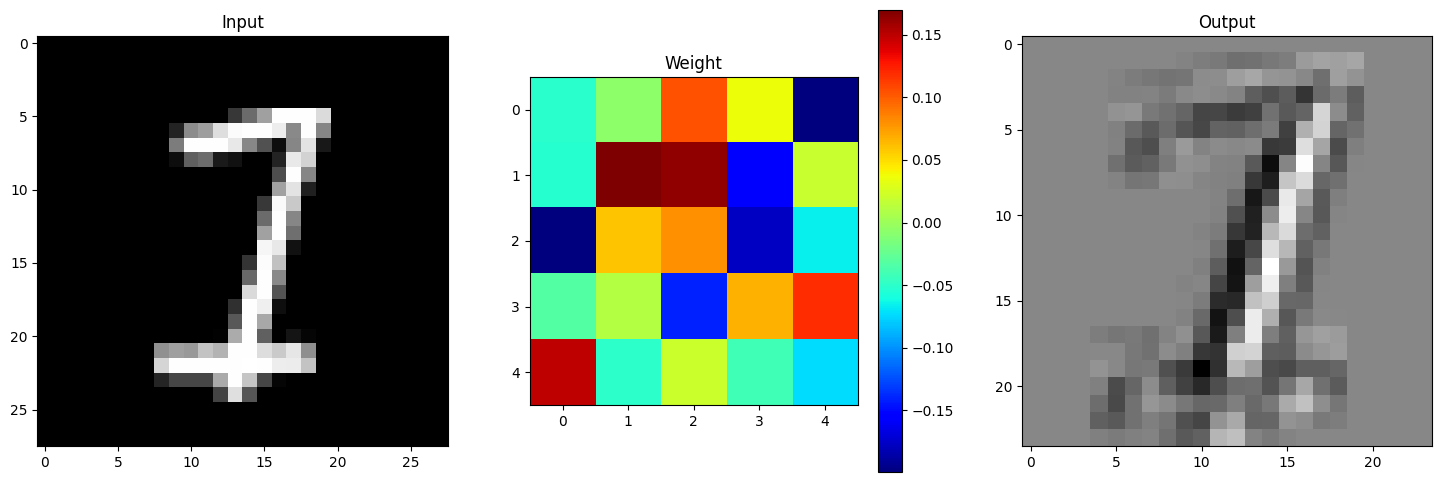

In [77]:
plt.figure(figsize=(18, 6))

plt.subplot(131); plt.title("Input")
plt.imshow(input_image, cmap='gray')

plt.subplot(132); plt.title("Weight")
plt.imshow(weight[0, 0, :, :], cmap='jet')
plt.colorbar()

plt.subplot(133); plt.title("Output")
plt.imshow(output_arr[0, 0, :, :], cmap='gray')

plt.show()

In [2]:
import torchmetrics

In [29]:
preds = torch.randn(10, 5).softmax(dim=1)
target = torch.randint(5, (10,))   

print(preds)
print()
print(target)

tensor([[0.6114, 0.0669, 0.1512, 0.0525, 0.1181],
        [0.0948, 0.0674, 0.7843, 0.0099, 0.0436],
        [0.0981, 0.2120, 0.1959, 0.4335, 0.0606],
        [0.7858, 0.1505, 0.0234, 0.0039, 0.0364],
        [0.0469, 0.4226, 0.1507, 0.2119, 0.1679],
        [0.0331, 0.0781, 0.3679, 0.4283, 0.0927],
        [0.0443, 0.1583, 0.4668, 0.1717, 0.1589],
        [0.0459, 0.0817, 0.0306, 0.7215, 0.1204],
        [0.0213, 0.2599, 0.0429, 0.2694, 0.4064],
        [0.0764, 0.1821, 0.0102, 0.0701, 0.6612]])

tensor([0, 1, 2, 1, 2, 3, 2, 0, 0, 4])


In [30]:
acc = torchmetrics.functional.accuracy(preds=preds, target=target, task='multiclass', num_classes=5)
print(acc)

tensor(0.4000)


In [52]:
metric = torchmetrics.Accuracy(task='multiclass', num_classes=5)
n_batches = 10

for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(high=5, size=(10,))
    print(preds)
    print(target)
      
    acc = metric(preds, target)
    print(f"accuracy : {acc:.2f}")
    print()
    
print()
final_acc = metric.compute()
print(f"final accuracy = {final_acc:.2f}")

tensor([[0.0230, 0.0836, 0.0776, 0.1776, 0.6382],
        [0.3031, 0.1142, 0.0343, 0.1291, 0.4194],
        [0.0491, 0.0900, 0.0854, 0.4163, 0.3593],
        [0.1335, 0.0859, 0.6628, 0.0833, 0.0346],
        [0.2083, 0.0515, 0.2776, 0.2840, 0.1787],
        [0.4442, 0.0335, 0.1290, 0.0549, 0.3383],
        [0.0450, 0.2963, 0.5365, 0.0658, 0.0564],
        [0.5339, 0.0957, 0.0821, 0.1133, 0.1751],
        [0.0437, 0.0212, 0.0306, 0.6440, 0.2605],
        [0.0147, 0.0355, 0.1487, 0.1152, 0.6859]])
tensor([4, 1, 2, 1, 0, 4, 1, 0, 0, 0])
accuracy : 0.20

tensor([[0.0638, 0.0258, 0.1093, 0.0349, 0.7663],
        [0.0470, 0.1201, 0.1874, 0.0311, 0.6144],
        [0.1772, 0.1684, 0.3180, 0.2385, 0.0978],
        [0.5651, 0.1129, 0.0312, 0.0973, 0.1934],
        [0.6660, 0.0796, 0.1324, 0.0149, 0.1071],
        [0.0722, 0.1006, 0.0125, 0.7855, 0.0293],
        [0.0430, 0.0338, 0.8898, 0.0252, 0.0082],
        [0.1620, 0.0706, 0.5748, 0.0751, 0.1175],
        [0.1747, 0.0468, 0.6690, 0.0531, 0.